# Markov Decision Processes and Dynamic Programming

<br/>
<p align="center">
<img src="https://miro.medium.com/max/1400/1*rCko3p9x0rDv3v57rfckIg.png" width=500 height=300>
</p>
<br/>

* MDP는 하나 이상의 상태들이 연결된 구조를 가정한다 (마르코프 체인).
* 상태는 노드로, 상태전이 관계는 링크로 표현된다.
* 상태가 다음 상태로 전이되는 과정은 확률적이다.
* 이 전이 과정에서 보상값이 부여된다.
* 완전히 아는(completely-known) MDP: 확률전이 과정에 대한 우리 지식이 위 그림처럼 완전하다.
* 잘 알지 못하는(incompletely-known) MDP: 확률전이 과정에 대한 지식이 불완전하다.
* MDP는 에이전트와 환경과의 합목적적 상호작용에 대한 효과적인 추상화이다.

## 보상(rewards)과 기대이익(expected returns)
* 합목적적 행위를 위해서는 단기 보상이 아니라 결과적으로 더 큰 보상값을 추구해야 한다.
* 기대이익은 바로 그것을 반영하는 개념이다.
    * $ G_t\doteq R_{t+1}+R_{t+2}+R_{t+3}+\cdots+R_T$
* 강화학습에서 현재 시점에서 멀리 떨어진 이득은 감쇄율($0 \leq \gamma \leq 1$)에 의해 감쇄된다고 가정한다.
    * $ G_t\doteq R_{t+1}+\gamma R_{t+2}+ \gamma^2 R_{t+3}+\cdots = \sum_{k=1}^{\infty} \gamma^k R_{t+k+1}$
* 따라서 만일 보상 감쇄율이 0보다 크고 1보다 작다면 기대이익은 시간이 흐름에 따라 지수함수적으로 감소하는 패턴을 띤다.
* "멀리 있는 보상은 가까운 보상보다 그 가치가 낮게 평가된다"

In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

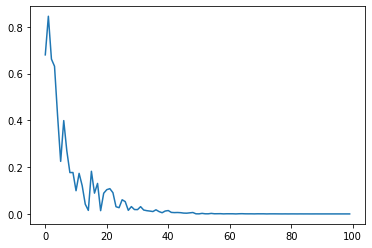

In [2]:
gamma = 0.9
rewards = np.random.rand(100)
discounted_rewards = [gamma**i * rewards[i] for i in range(100)]
plt.plot(discounted_rewards)

## 상태 가치함수 (state-value function)
* 현재 상태에 대한 가치는, 현재 상태에서 기대할 수 있는 이익(=기대이익)으로 정의된다.
* $v(s)=\mathbb{E}[G_t|S_t=s]$

## 행위 가치함수 (action-value function)
* 현재 상태와 행위에 대한 가치는, 현재 상태와 행위에 대한 기대이익으로 정의된다.
* $q(s,a)=\mathbb{E}[G_t|S_t=s, A_t=a]$

## 벨만 등식
* 벨만 등식은 상태들의 가치함수가 서로 연쇄적 관계를 갖는다는 것을 잘 보여준다.
* $v(s)=\mathbb{E}[R_{t+1}+\gamma v(S_{t+1})|S_t=s]$
* 즉, MDP에서 상태들의 가치는 서로 의존적이다. 상태 A의 다음의 상태 B의 가치가 높아진다면 상태 A의 가치도 상승한다.
* 일상적 용어로 해석하자면, 옆 동네의 가치가 올라가면 우리 동네의 가치도 그에 영향을 받아 올라간다.

<p align="center">
<img src="http://m.rcast.co.kr/Data/Conts/1509357567808.jpg" width="600" height="400">
</p>

## 벨만 등식 풀기
* MDP에 대한 벨만 등식을 푼다는 말의 의미는, 시작상태에서 종료상태로 이행하는 과정에서 기대이익을 최대화하는 경로를 찾는다는 것을 뜻한다.
* 에이전트가 현재 상태에서 어떤 상태로 이동하는가의 문제가 바로 결정(decision)의 문제이다.
* 그리고 policy는 어떤 상태에서 어떤 결정을 할 것인가를 에이전트에게 알려주는 결정함수를 가리킨다.
* 전통적으로 이런 문제(e.g., 여행하는 세일즈맨 문제)는 다이내믹 프로그래밍이 널리 이용되었다.
* 하지만 다이내믹 프로그래밍이 가정하는 문제의 상황은 맨 위의 그림에서처럼 상태이행 확률정보가 전부 알려진 경우에서 최적 policy 함수를 찾는 문제였다.

## 최적 정책(optimal policies)과 최적 가치 함수(optimal value functions)

* 최적 가치 함수
    * $v^*(s)\doteq \max_\pi v_\pi (s)$
* 최적 정책
    * $q^*(s,a)\doteq \max_\pi q_\pi (s,a)$
* 최적 정책은 최적 가치 함수가 있다면 쉽게 구할 수 있다.
    * $q^*(s,a)=\mathbb{E}[R_{t+1}+\gamma v^*(S_{t+1})|S_t=s]$

## Generalized Policy Iteration (GPI) 프레임워크

<p align="center">
<img src="http://sun000.cn/myImg/RL4_5.png" width="900" height="500">
</p>

## Policy evlaution 예시: Gridworld problem
* Gridworld 라고 하는 4$\times$4 그리드 월드 문제를 통해 위 과정이 무엇을 의미하는지 살펴보자.
* [예시코드](./Grid_world_ex.ipynb)

## Policy iteration
<p align="center">
<img src="https://jaydottechdotblog.files.wordpress.com/2016/12/rl-policy-iteration-algorithm.png?w=730">
</p>

## Value iteration
* Policy iteration은 한 후보 policy마다 policy evaluation 과정이 불필요하게 긴 측면이 있다.
* 따라서 value iteration 알고리즘은 policy evaluation 루프를 한번으로 단축시켰다.
* 이를 그림으로 표현하면 다음과 같다.
<br/>
<p align="center">
<img src="./images/value_iter.PNG">
</p>

* 정식 알고리즘은 아래와 같다.
<br/>
<p align="center">
<img src="https://jaydottechdotblog.files.wordpress.com/2016/12/rl-value-iteration-algorithm.png?w=730">
</p>